<a href="https://colab.research.google.com/github/nmizojp/my_colab/blob/master/opencv_mov_sttill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# My Driveをマウント
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# 結果を書き出すディレクトリを指定
out_path = "/content/drive/My Drive/mydata/result/"

In [0]:
# 処理をする対処のfileを指定
video_path = '/content/drive/My Drive/mydata/mov/fire.m4v'

In [4]:
print(out_path, '\n', video_path)

/content/drive/My Drive/mydata/result/ 
 /content/drive/My Drive/mydata/mov/fire.m4v


In [5]:
# ソースファイルがあるかの確認
import os
if not os.path.exists(video_path):
  print("ありません")
else:
  print('あります')

あります


In [6]:
# 保存パスの存在確認
if not os.path.exists(out_path):
  print("ありません")
else:
  print('保存場所はあります')

保存場所はあります


In [0]:
# 結果を保存するディレクトリを確認無ければ作成
if not os.path.exists(out_path):
  os.makedirs(dir_dst_path)

# 動画処理

In [0]:
import cv2

In [11]:
# 動画を読み込む
cap= cv2.VideoCapture(video_path)
type(cap)

cv2.VideoCapture

In [12]:
# 動画の情報取得
video_frame = (cap.get(cv2.CAP_PROP_FRAME_COUNT)) # フレーム数を取得する
video_fps = cap.get(cv2.CAP_PROP_FPS)           # FPS を取得する
video_len_sec = int(video_frame / video_fps)         # 長さ（秒）を計算する
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('存在するフレーム数:{}'.format(video_frame))
print('フレームレートFPS:{}'.format(video_fps))
print('秒数:{}'.format(video_len_sec))
print('フレームの横幅:{}'.format(width))
print('フレームの高さ:{}'.format(height))

存在するフレーム数:566.0
フレームレートFPS:29.97002997002997
秒数:18
フレームの横幅:1280
フレームの高さ:720


In [13]:
# 指定フレームに移動する
cap.set(cv2.CAP_PROP_POS_FRAMES, 12)

True

In [14]:
# フレームを読み込む　返値 実行出来たか、オブジェクト
ret, frame = cap.read()
print(ret)
print(type(frame))

True
<class 'numpy.ndarray'>


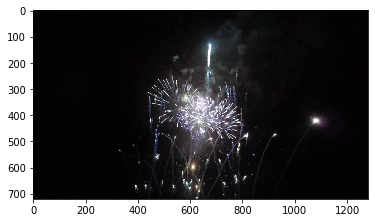

In [15]:
# 確認
import matplotlib.pyplot as plt
plt.imshow(frame)

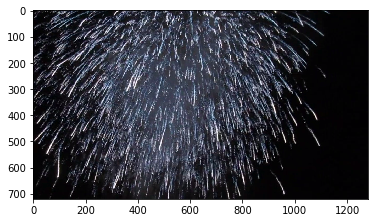

In [21]:
# 一連の処理
cap.set(cv2.CAP_PROP_POS_FRAMES, 250) # frame指定
ret, frame = cap.read()               # 取得
plt.imshow(frame)                     # 表示

In [22]:
# frameの実体は
print(type(frame), frame)

<class 'numpy.ndarray'> [[[5 4 6]
  [4 3 5]
  [4 3 5]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[5 4 6]
  [4 3 5]
  [4 3 5]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[4 3 5]
  [4 3 5]
  [4 3 5]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[3 2 4]
  [3 2 4]
  [3 2 4]
  ...
  [3 2 4]
  [3 2 4]
  [3 2 4]]

 [[3 2 4]
  [3 2 4]
  [3 2 4]
  ...
  [3 2 4]
  [3 2 4]
  [3 2 4]]

 [[3 2 4]
  [3 2 4]
  [3 2 4]
  ...
  [3 2 4]
  [3 2 4]
  [3 2 4]]]


In [23]:
# 書き出す
result_path = os.path.join(out_path, 'frame.png')
cv2.imwrite(result_path, frame)

True

In [0]:
# 関数frame_step(video_path, start_frame, stop_frame, step_frame,out_path, basename, ext='jpg')
# 指定範囲の任意のフレームを指定ステップで書き出す　margin_frameで前後カット
# 引数(argument)
# vidio_path : 入力ビデオファイル
# out_path   : 出力するディレクトリ
# basename   : 出力のfileの接頭子
# ext        : 出力fileの拡張子
# start_frame : 書き出す最初のフレームint
# stop_frame  : 最後のフレーム位置int
# step_frame  : step指定 int

def frame_step(video_path, margin_frame, step_frame, out_path, basename, ext='jpg'):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        return

    os.makedirs(out_path, exist_ok=True)
    base_path = os.path.join(out_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))
    last_frame = int(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - margin_frame)

    for n in range(margin_frame, last_frame, step_frame):
        cap.set(cv2.CAP_PROP_POS_FRAMES, n)
        ret, frame = cap.read()
        if ret:
            cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(digit), ext), frame)
        else:
            return


In [0]:
frame_step(video_path, 10, 30, out_path, 'img', ext='png')

In [0]:
# ディレクトリ内全ファイル削除関数
# Google ColaboratoryだとTrushゴミ箱に入るらしい、再読込? イマイチ確認不足
import shutil
def del_dir(dir_path='pic/'):
    if os.path.exists(dir_path): # フォルダが存在する場合中身を削除
        shutil.rmtree(dir_path)  # 削除

In [0]:
# 出力先ホルダー内のファイル削除
del_dir(out_path)

ls: cannot access '$/content/drive/My': No such file or directory
ls: cannot access 'Drive/mydata/result/': No such file or directory
